In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

In [2]:
geotracker= pd.read_csv('geotracker.csv', encoding='latin-1')
geotracker.head()

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,...,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3)
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,...,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1)
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,...,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3)
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,...,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F)
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,...,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)


In [3]:
geotracker_raw=geotracker

In [4]:
geotracker.columns

Index(['GLOBAL_ID', 'BUSINESS_NAME', 'STREET_NUMBER', 'STREET_NAME', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'EPA_REGION', 'LATITUDE', 'LONGITUDE',
       'COORDINATE_SOURCE', 'CASE_TYPE', 'STATUS', 'STATUS_DATE', 'CLAIM_NO',
       'CLAIM_STATUS', 'LEAD_AGENCY', 'CASEWORKER', 'LOCAL_AGENCY',
       'RB_CASE_NUMBER', 'LOC_CASE_NUMBER', 'FILE_LOCATION',
       'POTENTIAL_CONTAMINANTS_OF_CONCERN', 'QUANTITY_RELEASED_GALLONS',
       'POTENTIAL_MEDIA_OF_CONCERN', 'SITE_HISTORY', 'BEGIN_DATE',
       'LEAK_REPORTED_DATE', 'HOW_DISCOVERED', 'HOW_DISCOVERED_DESCRIPTION',
       'DISCHARGE_SOURCE', 'DISCHARGE_CAUSE', 'STOP_METHOD',
       'STOP_DESCRIPTION', 'NO_FURTHER_ACTION_DATE', 'CALWATER_WATERSHED_NAME',
       'DWR_GROUNDWATER_SUBBASIN_NAME', 'DISADVANTAGED_COMMUNITY',
       'CALENVIROSCREEN3_SCORE', 'CALENVIROSCREEN4_SCORE', 'MILITARY_DOD_SITE',
       'FACILITY_PROJECT_SUBTYPE', 'RWQCB_REGION'],
      dtype='object')

In [5]:
pd.DataFrame(geotracker.isnull().mean().sort_values(ascending=False)*100, columns=['Null%'])

,Null%
FACILITY_PROJECT_SUBTYPE,96.673461
STOP_DESCRIPTION,92.183899
HOW_DISCOVERED_DESCRIPTION,92.121285
QUANTITY_RELEASED_GALLONS,90.771752
DISADVANTAGED_COMMUNITY,81.402289
STOP_METHOD,76.394495
CLAIM_NO,74.550711
CLAIM_STATUS,74.550711
SITE_HISTORY,70.860477
DISCHARGE_CAUSE,59.303518


In [6]:
cont_count=pd.DataFrame(geotracker['POTENTIAL_CONTAMINANTS_OF_CONCERN'].value_counts()/geotracker['POTENTIAL_CONTAMINANTS_OF_CONCERN'].count()*100)

In [7]:
cont_count.head(9)

,count
POTENTIAL_CONTAMINANTS_OF_CONCERN,
Gasoline,45.653182
Diesel,14.487015
Waste Oil / Motor / Hydraulic / Lubricating,6.196490
Heating Oil / Fuel Oil,3.472817
Other Solvent or Non-Petroleum Hydrocarbon,1.872860
"Diesel, Gasoline",1.523259
Aviation,1.508990
"Gasoline, Diesel",1.259275
Tetrachloroethylene (PCE),1.182577


In [8]:
cont_count.to_csv('contaminants.csv')

In [9]:
geotracker['POTENTIAL_CONTAMINANTS_OF_CONCERN'].unique()

array(['Other Solvent or Non-Petroleum Hydrocarbon, Other Metal, Methane',
       'Asphalt, Diesel, Heating Oil / Fuel Oil, Kerosene, Waste Oil / Motor / Hydraulic / Lubricating',
       nan, ..., 'Tetrachloroethylene (PCE), Diesel, Kerosene',
       'Dichloroethane (DCA), Dichloroethene (DCE), Other Chlorinated Hydrocarbons, Tetrachloroethylene (PCE), Benzene, Diesel, Ethylbenzene, Gasoline, MTBE / TBA / Other Fuel Oxygenates, Naphthalene, Polynuclear aromatic hydrocarbons (PAHs), Toluene, Xylene',
       'Aviation, Diesel, Gasoline, Heating Oil / Fuel Oil, Kerosene'],
      shape=(4150,), dtype=object)

In [10]:
geotracker['COUNTY'].nunique()

58

In [11]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [12]:
import geopandas as gpd

In [13]:
import matplotlib.pyplot as plt

In [14]:
gpd.read_file('ca_counties.shp')

,Name,latitude,longitude,geometry
0,Del Norte,41.743438,-123.896950,"POLYGON ((-124.21285 41.87082, -124.21202 41.8..."
1,Siskiyou,41.592777,-122.540597,"POLYGON ((-123.51814 42.00116, -123.51014 42.0..."
2,Modoc,41.589786,-120.725183,"POLYGON ((-121.44763 41.99733, -121.43964 41.9..."
3,Humboldt,40.698631,-123.873714,"POLYGON ((-124.06517 41.46458, -124.06435 41.4..."
4,Trinity,40.650636,-123.112688,"POLYGON ((-122.67701 41.28037, -122.67721 41.2..."
5,Shasta,40.763804,-122.040258,"POLYGON ((-122.49835 41.18277, -122.49505 41.1..."
6,Lassen,40.673520,-120.594277,"POLYGON ((-121.3316 41.18456, -121.33138 41.18..."
7,Tehama,40.125749,-122.234031,"POLYGON ((-121.90141 40.42102, -121.90117 40.4..."
8,Plumas,40.004724,-120.838728,"POLYGON ((-121.49735 40.44559, -121.49061 40.4..."
9,Butte,39.667011,-121.600718,"POLYGON ((-121.63544 40.00088, -121.63545 40.0..."


In [15]:
ca_shape=gpd.read_file('ca_counties.shp')

In [16]:
ca_shape.head()

,Name,latitude,longitude,geometry
0,Del Norte,41.743438,-123.896950,"POLYGON ((-124.21285 41.87082, -124.21202 41.8..."
1,Siskiyou,41.592777,-122.540597,"POLYGON ((-123.51814 42.00116, -123.51014 42.0..."
2,Modoc,41.589786,-120.725183,"POLYGON ((-121.44763 41.99733, -121.43964 41.9..."
3,Humboldt,40.698631,-123.873714,"POLYGON ((-124.06517 41.46458, -124.06435 41.4..."
4,Trinity,40.650636,-123.112688,"POLYGON ((-122.67701 41.28037, -122.67721 41.2..."


In [17]:
ca_shape.columns=['COUNTY', 'latitude', 'longitude', 'geometry']

In [18]:
ca_shape.head()

,COUNTY,latitude,longitude,geometry
0,Del Norte,41.743438,-123.896950,"POLYGON ((-124.21285 41.87082, -124.21202 41.8..."
1,Siskiyou,41.592777,-122.540597,"POLYGON ((-123.51814 42.00116, -123.51014 42.0..."
2,Modoc,41.589786,-120.725183,"POLYGON ((-121.44763 41.99733, -121.43964 41.9..."
3,Humboldt,40.698631,-123.873714,"POLYGON ((-124.06517 41.46458, -124.06435 41.4..."
4,Trinity,40.650636,-123.112688,"POLYGON ((-122.67701 41.28037, -122.67721 41.2..."


<Axes: >

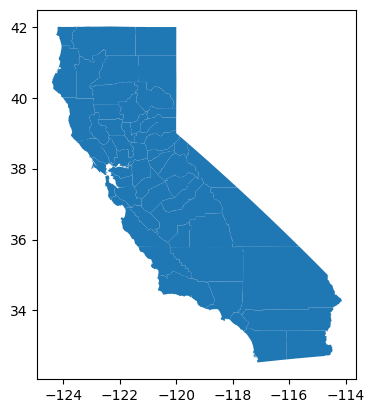

In [19]:
ca_shape.plot()

In [20]:
#I want to bring my county data (might be only open GW) as 1 point and then do heat map 

In [21]:
geotracker['COUNTY'].unique()

array(['Monterey', 'Sonoma', 'San Luis Obispo', 'Merced', 'Santa Clara',
       'Tulare', 'Imperial', 'El Dorado', 'Los Angeles', 'San Francisco',
       'Contra Costa', 'Placer', 'Kern', 'Napa', 'San Diego',
       'San Joaquin', 'Shasta', 'Tehama', 'Yolo', 'San Mateo', 'Orange',
       'San Benito', 'San Bernardino', 'Mendocino', 'Santa Barbara',
       'Lassen', 'Nevada', 'Solano', 'Yuba', 'Alameda', 'Calaveras',
       'Riverside', 'Plumas', 'Marin', 'Mariposa', 'Stanislaus',
       'Siskiyou', 'Santa Cruz', 'Humboldt', 'Sutter', 'Del Norte',
       'Butte', 'Fresno', 'Ventura', 'Sacramento', 'Colusa', 'Glenn',
       'Amador', 'Modoc', 'Inyo', 'Madera', 'Lake', 'Mono', 'Sierra',
       'Kings', nan, 'Tuolumne', 'Trinity', 'Alpine'], dtype=object)

In [22]:
geotracker['COUNTY'].isnull().sum()

np.int64(7)

In [23]:
geotracker[geotracker['COUNTY'].isnull()][['STATUS']]

,STATUS
1463,Review Complete - Denied
6759,* Open - Sampling Point
39589,* Open - Sampling Point
44398,* Open - Sampling Point
57949,Open
70631,* Open - Sampling Point
71090,* Open - Sampling Point


In [24]:
geotracker['COUNTY'].value_counts()

COUNTY
Los Angeles        14080
San Diego           7437
Orange              4885
Alameda             4631
Santa Clara         4148
Kern                3085
San Francisco       2847
Sacramento          2608
San Mateo           2334
Sonoma              2204
San Bernardino      2110
Ventura             2100
Santa Barbara       1929
Riverside           1761
Contra Costa        1557
San Joaquin         1510
Fresno              1359
Solano              1102
Humboldt             988
Merced               845
Stanislaus           741
Monterey             708
Tulare               704
Placer               647
Mendocino            616
Marin                574
Santa Cruz           529
San Luis Obispo      493
Imperial             486
Shasta               483
Napa                 469
Butte                441
Yolo                 426
Yuba                 387
Nevada               346
Kings                322
Siskiyou             289
Madera               273
El Dorado            265
Tehama            

In [25]:
geotracker[geotracker['COUNTY'] == 'Los Angeles']['STATUS'].value_counts()

STATUS
Completed - Case Closed                                     11098
Open - Site Assessment                                        617
Open - Inactive                                               559
Informational Item / Review Complete                          489
Open - Remediation                                            425
Open - Assessment & Interim Remedial Action                   190
SWT-No Plan Returned                                          121
Pre-Title 27 CAI - Completed - Case Closed/No Monitoring       99
Pending Review                                                 78
Open - Verification Monitoring                                 74
Open - Eligible for Closure                                    63
Pre-Title 27 CAI - Closed/No Monitoring                        48
Received                                                       43
Transferred to Other Agency                                    36
Open - Operating                                               28
UST

In [26]:
pd.DataFrame(geotracker.STATUS.value_counts())

,count
STATUS,
Completed - Case Closed,58411
Open - Site Assessment,3389
Informational Item / Review Complete,2483
Open - Inactive,1788
Open - Remediation,1780
Open,1022
Open - Verification Monitoring,973
Open - Assessment & Interim Remedial Action,880
SWT-No Plan Returned,586


In [27]:
geotracker.STATUS.isnull().sum()

np.int64(0)

In [28]:
pd.DataFrame(geotracker[geotracker['STATUS'] == 'Unknown'])[['BUSINESS_NAME','STATUS','COUNTY']]

,BUSINESS_NAME,STATUS,COUNTY
1216,Kennedy Mine Tailings,Unknown,Amador
1230,Big Blue Mine,Unknown,Kern
8278,Jeanette-Grant Mine,Unknown,Kern
8342,"Klondike, Dutch, and Telegraph Tunnel Mines",Unknown,Sierra
13227,Riverbank City Dump,Unknown,San Joaquin
17208,Mohawk Mine,Unknown,Nevada
18107,Spanish Mine,Unknown,Nevada
22415,Jacumba Hot Springs Illegal Disposal and Burn ...,Unknown,San Diego
26944,Stone Family Pauls 25 Compost Facility,Unknown,Merced
27334,Hoffman Pit Mine,Unknown,Placer


In [29]:
pd.DataFrame(geotracker[geotracker['STATUS'] == 'Not Applicable'])[['BUSINESS_NAME','STATUS','COUNTY']]#total of 30 unclassified status

,BUSINESS_NAME,STATUS,COUNTY
31082,San Diego Naval Subbase (NAVSUBASE) - Parent F...,Not Applicable,San Diego
31110,Coronado Naval Amphibious Base (NAVPHIBASE) - ...,Not Applicable,San Diego
35601,San Diego Fleet AntiSubmarine Warfare Training...,Not Applicable,San Diego
45168,Point Loma Naval Complex (SPAWAR PLC) - Parent...,Not Applicable,San Diego
58583,"Marine Corps Air Station, Miramar (MCAS) - Par...",Not Applicable,San Bernardino


In [30]:
(30/geotracker.shape[0])*100

0.03996642820031174

In [31]:
geotracker[geotracker['COUNTY'].isnull()][['GLOBAL_ID','BUSINESS_NAME','STREET_NUMBER','STREET_NAME','CITY','ZIP']]
# find all county names to fill nulls here : for status per county

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,ZIP
1463,GAOG10012394,"EXCLUSION - NORTH BELRIDGE - SEC 27 - T27S, R20E",NaN,17061-17077 WEST SIDE HWY,MCKITTRICK,93251
6759,GSP011000122,RR Emerg. Reg. Info Order_029-070-037-000,NaN,148 MEADOWCROFT WAY,SANTA ROSA,95403901
39589,GSP011000262,RR Emerg. Reg. Info Order_073-061-025-000,NaN,3010 BURNSIDE RD,SEBASTOPOL,954729407
44398,GSP011000115,RR Emerg. Reg. Info Order_028-290-047-000_1,NaN,3404 KINGS HILL RD,SANTA ROSA,954049637
57949,L10007168165,OCOTILLO ENERGY PROJECT,NaN,NaN,NaN,NaN
70631,GSP011000460,RR Emerg. Reg. Info Order_110-260-061-000,NaN,2660 WALLACE CREEK RD,HEALDSBURG,95448
71090,GSP011000206,RR Emerg. Reg. Info Order_061-100-081-000,NaN,9827 MILL STATION RD,SEBASTOPOL,954729662


In [32]:
 pd.set_option('display.max_columns', 40)

In [33]:
geotracker.columns

Index(['GLOBAL_ID', 'BUSINESS_NAME', 'STREET_NUMBER', 'STREET_NAME', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'EPA_REGION', 'LATITUDE', 'LONGITUDE',
       'COORDINATE_SOURCE', 'CASE_TYPE', 'STATUS', 'STATUS_DATE', 'CLAIM_NO',
       'CLAIM_STATUS', 'LEAD_AGENCY', 'CASEWORKER', 'LOCAL_AGENCY',
       'RB_CASE_NUMBER', 'LOC_CASE_NUMBER', 'FILE_LOCATION',
       'POTENTIAL_CONTAMINANTS_OF_CONCERN', 'QUANTITY_RELEASED_GALLONS',
       'POTENTIAL_MEDIA_OF_CONCERN', 'SITE_HISTORY', 'BEGIN_DATE',
       'LEAK_REPORTED_DATE', 'HOW_DISCOVERED', 'HOW_DISCOVERED_DESCRIPTION',
       'DISCHARGE_SOURCE', 'DISCHARGE_CAUSE', 'STOP_METHOD',
       'STOP_DESCRIPTION', 'NO_FURTHER_ACTION_DATE', 'CALWATER_WATERSHED_NAME',
       'DWR_GROUNDWATER_SUBBASIN_NAME', 'DISADVANTAGED_COMMUNITY',
       'CALENVIROSCREEN3_SCORE', 'CALENVIROSCREEN4_SCORE', 'MILITARY_DOD_SITE',
       'FACILITY_PROJECT_SUBTYPE', 'RWQCB_REGION'],
      dtype='object')

In [34]:
geotracker['MILITARY_DOD_SITE'].unique() 
#how many ground water project are associated with the United States Department of Defense (DOD)

array(['Yes', 'No'], dtype=object)

In [35]:
geotracker['LEAD_AGENCY'].nunique() #how many projects per agency?

103

In [36]:
geotracker['LEAK_REPORTED_DATE'].unique() 

array([nan, '2006-02-28T00:00:00Z', '2014-11-03T00:00:00Z', ...,
       '1999-10-30T00:00:00Z', '2018-10-23T00:00:00Z',
       '1994-12-03T00:00:00Z'], shape=(9331,), dtype=object)

In [37]:
geotracker['CASE_TYPE'].nunique() 

18

In [38]:
geotracker[geotracker['COUNTY'].isnull()]

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,LONGITUDE,COORDINATE_SOURCE,CASE_TYPE,STATUS,STATUS_DATE,CLAIM_NO,CLAIM_STATUS,LEAD_AGENCY,CASEWORKER,LOCAL_AGENCY,...,QUANTITY_RELEASED_GALLONS,POTENTIAL_MEDIA_OF_CONCERN,SITE_HISTORY,BEGIN_DATE,LEAK_REPORTED_DATE,HOW_DISCOVERED,HOW_DISCOVERED_DESCRIPTION,DISCHARGE_SOURCE,DISCHARGE_CAUSE,STOP_METHOD,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
1463,GAOG10012394,"EXCLUSION - NORTH BELRIDGE - SEC 27 - T27S, R20E",NaN,17061-17077 WEST SIDE HWY,MCKITTRICK,CA,93251,NaN,9,35.545856,-119.801103,Manual Entry on Screens,Well Stimulation Project - Exclusion,Review Complete - Denied,2022-05-19,NaN,NaN,SWRCB,VP,NaN,...,NaN,NaN,NaN,2018-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Valley Floor - Antelope Plain (558.60),San Joaquin Valley - Kern County (5-022.14),Disadvantaged Community,86-90%,85-90%,No,NaN,CENTRAL VALLEY RWQCB (REGION 5F)
6759,GSP011000122,RR Emerg. Reg. Info Order_029-070-037-000,NaN,148 MEADOWCROFT WAY,SANTA ROSA,CA,95403901,NaN,9,38.497361,-122.707953,Google Map Move,Sampling Point - Public,* Open - Sampling Point,2016-02-18,NaN,NaN,SWRCB,EM,NaN,...,NaN,NaN,NaN,2016-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian River - Middle Russian River - Mark We...,NaN,NaN,NaN,NaN,No,NaN,NaN
39589,GSP011000262,RR Emerg. Reg. Info Order_073-061-025-000,NaN,3010 BURNSIDE RD,SEBASTOPOL,CA,954729407,NaN,9,38.367557,-122.873541,Google Map Move,Sampling Point - Public,* Open - Sampling Point,2016-02-18,NaN,NaN,SWRCB,EM,NaN,...,NaN,NaN,NaN,2016-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian River - Lower Russian River - Guernevi...,Wilson Grove Formation Highlands (1-059),NaN,NaN,NaN,No,NaN,NaN
44398,GSP011000115,RR Emerg. Reg. Info Order_028-290-047-000_1,NaN,3404 KINGS HILL RD,SANTA ROSA,CA,954049637,NaN,9,38.548733,-122.633920,Google Map Move,Sampling Point - Public,* Open - Sampling Point,2016-02-18,NaN,NaN,SWRCB,EM,NaN,...,NaN,NaN,NaN,2016-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian River - Middle Russian River - Mark We...,NaN,NaN,NaN,NaN,No,NaN,NaN
57949,L10007168165,OCOTILLO ENERGY PROJECT,NaN,NaN,NaN,CA,NaN,NaN,9,NaN,NaN,Manual Entry on Screens,Land Disposal Site,Open,1965-01-01,NaN,NaN,COLORADO RIVER BASIN RWQCB (REGION 7),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Title 27 - Surface Impoundment,NaN
70631,GSP011000460,RR Emerg. Reg. Info Order_110-260-061-000,NaN,2660 WALLACE CREEK RD,HEALDSBURG,CA,95448,NaN,9,38.363190,-225.610560,NaN,Sampling Point - Public,* Open - Sampling Point,2016-02-18,NaN,NaN,SWRCB,EM,NaN,...,NaN,NaN,NaN,2016-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
71090,GSP011000206,RR Emerg. Reg. Info Order_061-100-081-000,NaN,9827 MILL STATION RD,SEBASTOPOL,CA,954729662,NaN,9,38.416652,-122.875316,Google Map Move,Sampling Point - Public,* Open - Sampling Point,2016-02-18,NaN,NaN,SWRCB,EM,NaN,...,NaN,NaN,NaN,2016-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian River - Lower Russian River - Guernevi...,Wilson Grove Formation Highlands (1-059),NaN,NaN,NaN,No,NaN,NaN


In [39]:
geotracker.RWQCB_REGION.nunique()

12

In [40]:
geotracker.CALENVIROSCREEN4_SCORE.unique()

array(['45-50%', '20-25%', '35-40%', '95-100% (highest scores)', '80-85%',
       '40-45%', '70-75%', nan, '30-35%', '90-95%',
       '1-5% (lowest scores)', '15-20%', '60-65%', '10-15%', '85-90%',
       '65-70%', '50-55%', '75-80%', '55-60%', '5-10%', '25-30%'],
      dtype=object)

In [41]:
geotracker.CALENVIROSCREEN4_SCORE.value_counts()

CALENVIROSCREEN4_SCORE
95-100% (highest scores)    4837
80-85%                      4652
50-55%                      4378
90-95%                      4324
55-60%                      4179
70-75%                      4100
45-50%                      3992
75-80%                      3974
60-65%                      3907
85-90%                      3730
30-35%                      3407
40-45%                      3323
65-70%                      3304
25-30%                      3123
35-40%                      3113
20-25%                      2635
15-20%                      2604
10-15%                      2370
1-5% (lowest scores)        1962
5-10%                       1892
Name: count, dtype: int64

In [42]:
geotracker.DISADVANTAGED_COMMUNITY.value_counts()

DISADVANTAGED_COMMUNITY
Severely Disadvantaged Community    7355
Disadvantaged Community             6605
Name: count, dtype: int64

In [43]:
geotracker.DISADVANTAGED_COMMUNITY.isnull().mean()*100

np.float64(81.4022887441216)

In [44]:
geotracker.groupby('CALENVIROSCREEN4_SCORE')[['DISADVANTAGED_COMMUNITY']].count().sum()

DISADVANTAGED_COMMUNITY    12990
dtype: int64

In [45]:
geotracker['DISADVANTAGED_COMMUNITY'].isnull().sum() 

np.int64(61103)

In [46]:
geotracker.CASE_TYPE.unique()

array(['Military Cleanup Site', 'Cleanup Program Site', '* NPDES',
       'LUST Cleanup Site', 'Produced Water Ponds',
       'Non-Case Information', 'Land Disposal Site', 'Military UST Site',
       'Other Oil and Gas Projects', 'Military Privatized Site',
       'Sampling Point - Public', 'Project',
       'Underground Injection Control (UIC)', 'Single-Walled UST',
       'Well Stimulation Project - Exclusion',
       '* Confined Animal Facilities (CAF)',
       'Well Stimulation Project - Groundwater Monitoring Plan',
       'Aquifer Exemption'], dtype=object)

In [47]:
geotracker.CALENVIROSCREEN4_SCORE.unique()

array(['45-50%', '20-25%', '35-40%', '95-100% (highest scores)', '80-85%',
       '40-45%', '70-75%', nan, '30-35%', '90-95%',
       '1-5% (lowest scores)', '15-20%', '60-65%', '10-15%', '85-90%',
       '65-70%', '50-55%', '75-80%', '55-60%', '5-10%', '25-30%'],
      dtype=object)

In [48]:
geotracker.CASE_TYPE.value_counts()

CASE_TYPE
LUST Cleanup Site                                         42235
Cleanup Program Site                                      17142
Military Cleanup Site                                      3736
Military UST Site                                          2932
Non-Case Information                                       2885
Land Disposal Site                                         2113
Single-Walled UST                                           825
Underground Injection Control (UIC)                         759
Produced Water Ponds                                        748
Military Privatized Site                                    672
Sampling Point - Public                                     508
* NPDES                                                     217
Project                                                      80
* Confined Animal Facilities (CAF)                           72
Other Oil and Gas Projects                                   68
Well Stimulation Project - Exc

In [49]:
open_status_by_county= pd .merge( geotracker, ca_shape, how = "left", on = 'COUNTY' )  
open_status_by_county.head()

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,LONGITUDE,COORDINATE_SOURCE,CASE_TYPE,STATUS,STATUS_DATE,CLAIM_NO,CLAIM_STATUS,LEAD_AGENCY,CASEWORKER,LOCAL_AGENCY,...,BEGIN_DATE,LEAK_REPORTED_DATE,HOW_DISCOVERED,HOW_DISCOVERED_DESCRIPTION,DISCHARGE_SOURCE,DISCHARGE_CAUSE,STOP_METHOD,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION,latitude,longitude,geometry
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,-121.215291,Manual Entry on Screens,Military Cleanup Site,Open - Long Term Management,2022-04-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),KLS,NaN,...,2009-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3),36.217294,-121.239411,"POLYGON ((-121.8108 36.85193, -121.80575 36.85..."
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,-122.709840,NaN,Cleanup Program Site,Open - Remediation,2023-02-28,NaN,NaN,NORTH COAST RWQCB (REGION 1),MWS,NaN,...,2019-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1),38.528560,-122.887483,"POLYGON ((-123.48149 38.72638, -123.48201 38.7..."
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,-120.673299,NaN,* NPDES,Active,2024-09-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),SC,NaN,...,2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3),35.387170,-120.404114,"POLYGON ((-121.3475 35.7953, -121.3395 35.7952..."
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,-120.477262,Google Map Move,LUST Cleanup Site,Open - Site Assessment,2006-02-28,"19107, 21237, B0340, E0084","Ineligible, Active, Ineligible, Ineligible",CENTRAL VALLEY RWQCB (REGION 5S),BDS,MERCED COUNTY,...,2006-02-28,2006-02-28T00:00:00Z,Site Assessment/Site Investigation,NaN,Other,Unknown,Remove Contents,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F),37.192805,-120.717925,"POLYGON ((-120.38829 37.63376, -120.38819 37.6..."
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,-121.987424,NaN,Cleanup Program Site,Open - Site Assessment,2014-12-08,NaN,NaN,SANTA CLARA COUNTY LOP,HH,SANTA CLARA COUNTY LOP,...,2014-11-03,2014-11-03T00:00:00Z,Site Assessment/Site Investigation,NaN,NaN,Unknown,NaN,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2),37.231466,-121.694371,"POLYGON ((-122.11522 37.46609, -122.11517 37.4..."


In [50]:
open_status_by_county=open_status_by_county[['GLOBAL_ID','COUNTY','STATUS','latitude','longitude','geometry']]
open_status_by_county.head()

,GLOBAL_ID,COUNTY,STATUS,latitude,longitude,geometry
0,DOD100186700,Monterey,Open - Long Term Management,36.217294,-121.239411,"POLYGON ((-121.8108 36.85193, -121.80575 36.85..."
1,T10000012752,Sonoma,Open - Remediation,38.528560,-122.887483,"POLYGON ((-123.48149 38.72638, -123.48201 38.7..."
2,NPD100051582,San Luis Obispo,Active,35.387170,-120.404114,"POLYGON ((-121.3475 35.7953, -121.3395 35.7952..."
3,T0604762455,Merced,Open - Site Assessment,37.192805,-120.717925,"POLYGON ((-120.38829 37.63376, -120.38819 37.6..."
4,T10000006370,Santa Clara,Open - Site Assessment,37.231466,-121.694371,"POLYGON ((-122.11522 37.46609, -122.11517 37.4..."


In [51]:
open_status_by_county[open_status_by_county.COUNTY.isnull()]

,GLOBAL_ID,COUNTY,STATUS,latitude,longitude,geometry
1463,GAOG10012394,NaN,Review Complete - Denied,NaN,NaN,None
6759,GSP011000122,NaN,* Open - Sampling Point,NaN,NaN,None
39589,GSP011000262,NaN,* Open - Sampling Point,NaN,NaN,None
44398,GSP011000115,NaN,* Open - Sampling Point,NaN,NaN,None
57949,L10007168165,NaN,Open,NaN,NaN,None
70631,GSP011000460,NaN,* Open - Sampling Point,NaN,NaN,None
71090,GSP011000206,NaN,* Open - Sampling Point,NaN,NaN,None


In [52]:
county_no_null=pd.read_csv('Countynonull.csv')

In [53]:
score_by_county= pd .merge( county_no_null, ca_shape, how = "left", on = 'COUNTY' )

In [54]:
score_by_county=score_by_county[['GLOBAL_ID','COUNTY','CALENVIROSCREEN4_SCORE','latitude','longitude','geometry']]
score_by_county

,GLOBAL_ID,COUNTY,CALENVIROSCREEN4_SCORE,latitude,longitude,geometry
0,DOD100186700,Monterey,45-50%,36.217294,-121.239411,"POLYGON ((-121.8108 36.85193, -121.80575 36.85..."
1,T10000012752,Sonoma,20-25%,38.528560,-122.887483,"POLYGON ((-123.48149 38.72638, -123.48201 38.7..."
2,NPD100051582,San Luis Obispo,35-40%,35.387170,-120.404114,"POLYGON ((-121.3475 35.7953, -121.3395 35.7952..."
3,T0604762455,Merced,95-100% (highest scores),37.192805,-120.717925,"POLYGON ((-120.38829 37.63376, -120.38819 37.6..."
4,T10000006370,Santa Clara,35-40%,37.231466,-121.694371,"POLYGON ((-122.11522 37.46609, -122.11517 37.4..."
...,...,...,...,...,...,...
75058,SLT5S0753116,Stanislaus,60-65%,37.559623,-120.997729,"POLYGON ((-120.92659 38.0775, -120.92059 38.07..."
75059,DOD100037100,San Diego,45-50%,33.035904,-116.733116,"POLYGON ((-117.50967 33.50513, -117.50167 33.5..."
75060,T0604500317,Mendocino,10-15%,39.440446,-123.391376,"POLYGON ((-124.02328 40.00132, -124.01528 40.0..."
75061,T10000000477,San Diego,55-60%,33.035904,-116.733116,"POLYGON ((-117.50967 33.50513, -117.50167 33.5..."


In [55]:
score_by_county['COUNTY'].isnull().sum()

np.int64(0)

In [56]:
open_status_by_county['Status_Category'] = ""
open_status_by_county.loc[open_status_by_county['STATUS'].str.contains('Closed|Complete|Historic|Returned|Discontinued|Verified|',case=False), 'Status_Category'] = 'Closed'
open_status_by_county.loc[open_status_by_county['STATUS'].str.contains('Open|Active|Unpermitted|Confirmed Plan|CAF|Received|Under Review|Federally Owned SWT', case=False), 'Status_Category'] = 'Open'
open_status_by_county.loc[open_status_by_county['STATUS'].str.contains('Not Applicable|Unknown|with Monitoring|Pending|Transferred to Other Agency|Abandoned SWT', case=False), 'Status_Category'] = 'Others'
open_status_by_county.head()

,GLOBAL_ID,COUNTY,STATUS,latitude,longitude,geometry,Status_Category
0,DOD100186700,Monterey,Open - Long Term Management,36.217294,-121.239411,"POLYGON ((-121.8108 36.85193, -121.80575 36.85...",Open
1,T10000012752,Sonoma,Open - Remediation,38.528560,-122.887483,"POLYGON ((-123.48149 38.72638, -123.48201 38.7...",Open
2,NPD100051582,San Luis Obispo,Active,35.387170,-120.404114,"POLYGON ((-121.3475 35.7953, -121.3395 35.7952...",Open
3,T0604762455,Merced,Open - Site Assessment,37.192805,-120.717925,"POLYGON ((-120.38829 37.63376, -120.38819 37.6...",Open
4,T10000006370,Santa Clara,Open - Site Assessment,37.231466,-121.694371,"POLYGON ((-122.11522 37.46609, -122.11517 37.4...",Open


In [57]:
trial_shape=open_status_by_county[open_status_by_county['Status_Category']=='Open']
trial_shape.shape

(12270, 7)

In [58]:
def Score_category(row):
    low = ['20-25%', '35-40%', '30-35%', '1-5%', '15-20%', '10-15%', '5-10%', '25-30%']
    medium = ['45-50%', '40-45%', '50-55%', '75-80%', '55-60%']
    high = ['95-100%', '80-85%', '90-95%', '85-90%']
    if row in low:
        return 'Low'
    elif row in medium:
        return 'Medium'
    elif row in high:
        return 'High'
    else:
        return 'Unrecorded'

In [59]:
score_by_county['Scores_Category'] = score_by_county['CALENVIROSCREEN4_SCORE'].apply(Score_category)
score_by_county

,GLOBAL_ID,COUNTY,CALENVIROSCREEN4_SCORE,latitude,longitude,geometry,Scores_Category
0,DOD100186700,Monterey,45-50%,36.217294,-121.239411,"POLYGON ((-121.8108 36.85193, -121.80575 36.85...",Medium
1,T10000012752,Sonoma,20-25%,38.528560,-122.887483,"POLYGON ((-123.48149 38.72638, -123.48201 38.7...",Low
2,NPD100051582,San Luis Obispo,35-40%,35.387170,-120.404114,"POLYGON ((-121.3475 35.7953, -121.3395 35.7952...",Low
3,T0604762455,Merced,95-100% (highest scores),37.192805,-120.717925,"POLYGON ((-120.38829 37.63376, -120.38819 37.6...",Unrecorded
4,T10000006370,Santa Clara,35-40%,37.231466,-121.694371,"POLYGON ((-122.11522 37.46609, -122.11517 37.4...",Low
...,...,...,...,...,...,...,...
75058,SLT5S0753116,Stanislaus,60-65%,37.559623,-120.997729,"POLYGON ((-120.92659 38.0775, -120.92059 38.07...",Unrecorded
75059,DOD100037100,San Diego,45-50%,33.035904,-116.733116,"POLYGON ((-117.50967 33.50513, -117.50167 33.5...",Medium
75060,T0604500317,Mendocino,10-15%,39.440446,-123.391376,"POLYGON ((-124.02328 40.00132, -124.01528 40.0...",Low
75061,T10000000477,San Diego,55-60%,33.035904,-116.733116,"POLYGON ((-117.50967 33.50513, -117.50167 33.5...",Medium


In [60]:
score_by_county['Scores_Code'] = score_by_county['Scores_Category'].map({
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Unrecorded': 0
})

In [61]:
score_by_county_gdf= gpd.GeoDataFrame(score_by_county, geometry='geometry')

In [62]:
countycount= score_by_county.groupby('COUNTY')['Scores_Code'].mean().reset_index()

In [63]:
countycount.sort_values(by='Scores_Code', ascending = 0)

,COUNTY,Scores_Code
15,Kings,1.953416
12,Imperial,1.936345
10,Glenn,1.880435
33,Sacramento,1.758052
14,Kern,1.717666
47,Solano,1.645191
53,Tulare,1.639205
2,Amador,1.622951
7,Del Norte,1.594937
54,Tuolumne,1.448649


In [64]:
lastshape= pd .merge( countycount, ca_shape, how = "left", on = 'COUNTY' )

In [65]:
lastshape.head()

,COUNTY,Scores_Code,latitude,longitude,geometry
0,Alameda,1.279637,37.644874,-121.882289,"POLYGON ((-122.3111 37.8634, -122.31217 37.863..."
1,Alpine,0.961538,38.597971,-119.820211,"POLYGON ((-119.93538 38.80848, -119.93531 38.8..."
2,Amador,1.622951,38.446117,-120.651572,"POLYGON ((-120.25874 38.58, -120.25843 38.5801..."
3,Butte,1.160998,39.667011,-121.600718,"POLYGON ((-121.63544 40.00088, -121.63545 40.0..."
4,Calaveras,1.303571,38.205015,-120.553757,"POLYGON ((-120.21089 38.5, -120.21068 38.50009..."


In [66]:
gdf= gpd.GeoDataFrame(lastshape, geometry='geometry')

<Axes: >

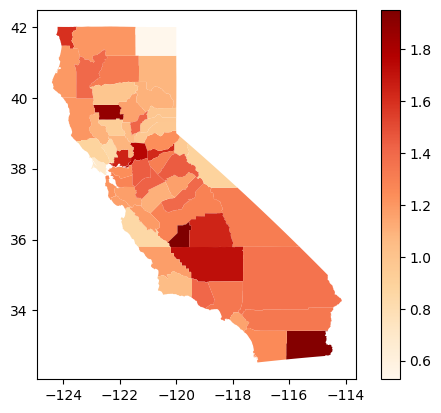

In [67]:

gdf.plot(column='Scores_Code', cmap='OrRd', legend=True)

In [153]:
gdf.sort_values(by='Scores_Code', ascending =0)

,COUNTY,Scores_Code,latitude,longitude,geometry
15,Kings,1.953416,36.075306,-119.815548,"POLYGON ((-120.31476 35.90721, -120.30844 35.9..."
12,Imperial,1.936345,33.039667,-115.365267,"POLYGON ((-116.08518 33.42603, -116.08513 33.4..."
10,Glenn,1.880435,39.598366,-122.392092,"POLYGON ((-122.93751 39.79794, -122.93751 39.7..."
33,Sacramento,1.758052,38.454384,-121.338809,"POLYGON ((-121.60327 38.73611, -121.59932 38.7..."
14,Kern,1.717666,35.342839,-118.729938,"POLYGON ((-117.66736 34.82252, -117.67536 34.8..."
47,Solano,1.645191,38.280962,-121.925389,"MULTIPOLYGON (((-122.36648 38.15575, -122.3645..."
53,Tulare,1.639205,36.220431,-118.800475,"POLYGON ((-118.36958 36.75385, -118.36941 36.7..."
2,Amador,1.622951,38.446117,-120.651572,"POLYGON ((-120.25874 38.58, -120.25843 38.5801..."
7,Del Norte,1.594937,41.743438,-123.896950,"POLYGON ((-124.21285 41.87082, -124.21202 41.8..."
54,Tuolumne,1.448649,38.027783,-119.954608,"POLYGON ((-120.06366 38.41507, -120.06325 38.4..."


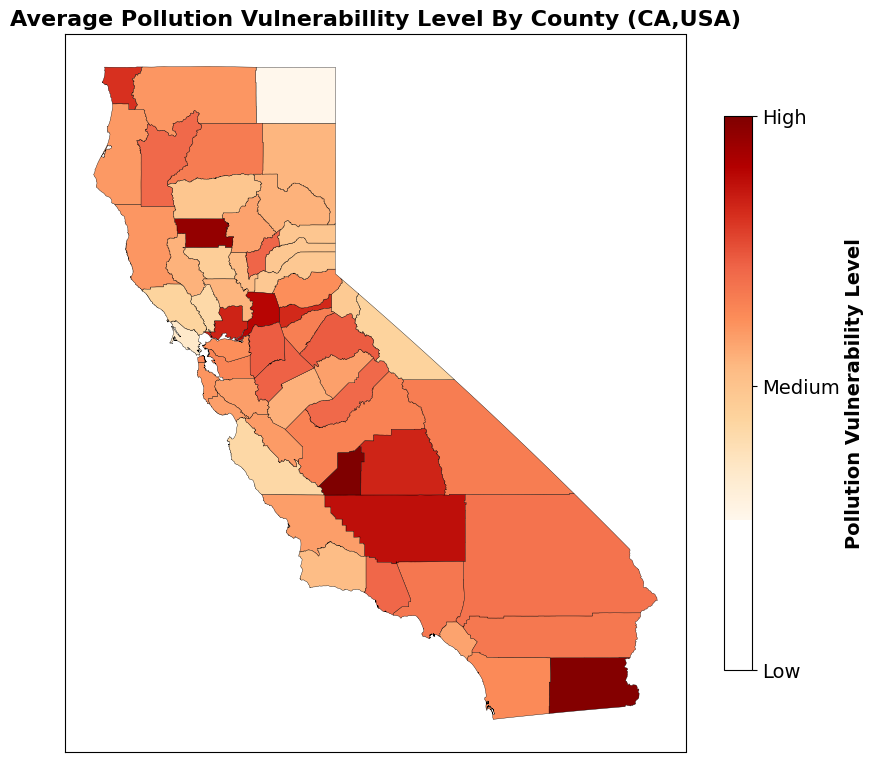

In [69]:
#Visual 1 is done :))))))))))
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))

gdf.plot(column='Scores_Code',
        cmap='OrRd', legend=True,
        edgecolor='black',linewidth=0.25,
        ax=ax,legend_kwds={'label': "Pollution Vulnerability Level",
                           'orientation': "vertical",'shrink': 0.6}  )


legendcats= ax.get_figure().axes[-1] 
legendcats.set_yticks([0,1,1.953416])
legendcats.set_yticklabels(['Low', 'Medium', 'High'],fontsize=14)
legendcats.set_ylabel("Pollution Vulnerability Level", fontsize=14, weight='bold')
ax.set_xticks([])
ax.set_yticks([])	
ax.set_title('Average Pollution Vulnerabillity Level By County (CA,USA)',fontsize=16,weight='bold')
plt.savefig('Average_Pollution_Vulnerabillity_Level.png')  

In [70]:
geotracker.POTENTIAL_CONTAMINANTS_OF_CONCERN.nunique()

4149

In [71]:
cont_df=pd.DataFrame(geotracker.POTENTIAL_CONTAMINANTS_OF_CONCERN.unique())
cont_df.to_csv('cont_df.csv', index=0)

In [72]:
geotracker.BEGIN_DATE=pd.to_datetime(geotracker.BEGIN_DATE)

In [73]:
geotracker.dtypes

GLOBAL_ID                                    object
BUSINESS_NAME                                object
STREET_NUMBER                                object
STREET_NAME                                  object
CITY                                         object
STATE                                        object
ZIP                                          object
COUNTY                                       object
EPA_REGION                                    int64
LATITUDE                                    float64
LONGITUDE                                   float64
COORDINATE_SOURCE                            object
CASE_TYPE                                    object
STATUS                                       object
STATUS_DATE                                  object
CLAIM_NO                                     object
CLAIM_STATUS                                 object
LEAD_AGENCY                                  object
CASEWORKER                                   object
LOCAL_AGENCY

In [74]:
geotracker['year']= geotracker.BEGIN_DATE.dt.year

In [75]:
geotracker.head()

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,LONGITUDE,COORDINATE_SOURCE,CASE_TYPE,STATUS,STATUS_DATE,CLAIM_NO,CLAIM_STATUS,LEAD_AGENCY,CASEWORKER,LOCAL_AGENCY,...,POTENTIAL_MEDIA_OF_CONCERN,SITE_HISTORY,BEGIN_DATE,LEAK_REPORTED_DATE,HOW_DISCOVERED,HOW_DISCOVERED_DESCRIPTION,DISCHARGE_SOURCE,DISCHARGE_CAUSE,STOP_METHOD,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION,year
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,-121.215291,Manual Entry on Screens,Military Cleanup Site,Open - Long Term Management,2022-04-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),KLS,NaN,...,"Aquifer used for drinking water supply, Soil, ...","This landfill is closed, and no longer receive...",2009-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3),2009.0
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,-122.709840,NaN,Cleanup Program Site,Open - Remediation,2023-02-28,NaN,NaN,NORTH COAST RWQCB (REGION 1),MWS,NaN,...,Soil,Please see the associated Geotracker for all i...,2019-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1),2019.0
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,-120.673299,NaN,* NPDES,Active,2024-09-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),SC,NaN,...,NaN,NaN,2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3),2014.0
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,-120.477262,Google Map Move,LUST Cleanup Site,Open - Site Assessment,2006-02-28,"19107, 21237, B0340, E0084","Ineligible, Active, Ineligible, Ineligible",CENTRAL VALLEY RWQCB (REGION 5S),BDS,MERCED COUNTY,...,Under Investigation,In February of 2006 site assessment activities...,2006-02-28,2006-02-28T00:00:00Z,Site Assessment/Site Investigation,NaN,Other,Unknown,Remove Contents,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F),2006.0
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,-121.987424,NaN,Cleanup Program Site,Open - Site Assessment,2014-12-08,NaN,NaN,SANTA CLARA COUNTY LOP,HH,SANTA CLARA COUNTY LOP,...,"Soil, Soil Vapor",pestcides in shallow soil soil vapor sampling...,2014-11-03,2014-11-03T00:00:00Z,Site Assessment/Site Investigation,NaN,NaN,Unknown,NaN,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2),2014.0


In [76]:
geotracker.year.fillna('Unrecorded', inplace=True)

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_17380\4043133142.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  geotracker.year.fillna('Unrecorded', inplace=True)
C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_17380\4043133142.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unrecorded' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  geotracker.year.fillna('Unrecorded', inplace=True)


In [77]:
geotracker.year.isnull().sum()

np.int64(0)

In [78]:
geotracker.groupby('year').agg({'GLOBAL_ID':'count'})

,GLOBAL_ID
year,
1966.0,2
1967.0,13
1968.0,2
1969.0,1
1970.0,18
...,...
2023.0,455
2024.0,287
2025.0,465


In [79]:
geotracker.year.unique()

array([2009.0, 2019.0, 2014.0, 2006.0, 2018.0, 2015.0, 2001.0, 2017.0,
       2010.0, 2016.0, 2000.0, 2021.0, 2007.0, 1991.0, 2020.0, 1998.0,
       1997.0, 2012.0, 2008.0, 'Unrecorded', 2003.0, 2011.0, 2024.0,
       2004.0, 1989.0, 1993.0, 1996.0, 1983.0, 2013.0, 1984.0, 1992.0,
       2002.0, 2022.0, 1988.0, 1990.0, 1987.0, 1985.0, 1986.0, 1994.0,
       1995.0, 1999.0, 2005.0, 1979.0, 2023.0, 2025.0, 1971.0, 1982.0,
       1966.0, 1973.0, 1981.0, 1972.0, 1977.0, 1975.0, 1970.0, 1980.0,
       1978.0, 1974.0, 1976.0, 1967.0, 2099.0, 1968.0, 1969.0],
      dtype=object)

In [80]:
year_df=geotracker[(geotracker['year']!='Unrecorded')& (geotracker['year']!=2099.0)]

In [81]:
geotracker[geotracker['year']==2099.0]

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,LONGITUDE,COORDINATE_SOURCE,CASE_TYPE,STATUS,STATUS_DATE,CLAIM_NO,CLAIM_STATUS,LEAD_AGENCY,CASEWORKER,LOCAL_AGENCY,...,POTENTIAL_MEDIA_OF_CONCERN,SITE_HISTORY,BEGIN_DATE,LEAK_REPORTED_DATE,HOW_DISCOVERED,HOW_DISCOVERED_DESCRIPTION,DISCHARGE_SOURCE,DISCHARGE_CAUSE,STOP_METHOD,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION,year
11572,SLT8R1204127,CHEMWEST,13425,SAN BERNARDINO AVENUE,FONTANA,CA,NaN,San Bernardino,9,34.077558,-117.432655,NaN,Cleanup Program Site,Completed - Case Closed,2099-04-26,NaN,NaN,SANTA ANA RWQCB (REGION 8),KDP,NaN,...,NaN,NaN,2099-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2099-04-26T00:00:00Z,Santa Ana River - Middle Santa Ana River - Chi...,Upper Santa Ana Valley - Chino (8-002.01),NaN,96-100% (highest scores),90-95%,No,NaN,SANTA ANA RWQCB (REGION 8),2099.0


In [82]:
year_list=[2009.0, 2019.0, 2014.0, 2006.0, 2018.0, 2015.0, 2001.0, 2017.0,
       2010.0, 2016.0, 2000.0, 2021.0, 2007.0, 1991.0, 2020.0, 1998.0,
       1997.0, 2012.0, 2008.0, 2003.0, 2011.0, 2024.0,
       2004.0, 1989.0, 1993.0, 1996.0, 1983.0, 2013.0, 1984.0, 1992.0,
       2002.0, 2022.0, 1988.0, 1990.0, 1987.0, 1985.0, 1986.0, 1994.0,
       1995.0, 1999.0, 2005.0, 1979.0, 2023.0, 2025.0, 1971.0, 1982.0,
       1966.0, 1973.0, 1981.0, 1972.0, 1977.0, 1975.0, 1970.0, 1980.0,
       1978.0, 1974.0, 1976.0, 1967.0, 1968.0, 1969.0]
print (min(year_list), max(year_list), len(year_list))

1966.0 2025.0 60


In [83]:
year_df.head()

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,LONGITUDE,COORDINATE_SOURCE,CASE_TYPE,STATUS,STATUS_DATE,CLAIM_NO,CLAIM_STATUS,LEAD_AGENCY,CASEWORKER,LOCAL_AGENCY,...,POTENTIAL_MEDIA_OF_CONCERN,SITE_HISTORY,BEGIN_DATE,LEAK_REPORTED_DATE,HOW_DISCOVERED,HOW_DISCOVERED_DESCRIPTION,DISCHARGE_SOURCE,DISCHARGE_CAUSE,STOP_METHOD,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION,year
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,-121.215291,Manual Entry on Screens,Military Cleanup Site,Open - Long Term Management,2022-04-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),KLS,NaN,...,"Aquifer used for drinking water supply, Soil, ...","This landfill is closed, and no longer receive...",2009-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3),2009.0
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,-122.709840,NaN,Cleanup Program Site,Open - Remediation,2023-02-28,NaN,NaN,NORTH COAST RWQCB (REGION 1),MWS,NaN,...,Soil,Please see the associated Geotracker for all i...,2019-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1),2019.0
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,-120.673299,NaN,* NPDES,Active,2024-09-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),SC,NaN,...,NaN,NaN,2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3),2014.0
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,-120.477262,Google Map Move,LUST Cleanup Site,Open - Site Assessment,2006-02-28,"19107, 21237, B0340, E0084","Ineligible, Active, Ineligible, Ineligible",CENTRAL VALLEY RWQCB (REGION 5S),BDS,MERCED COUNTY,...,Under Investigation,In February of 2006 site assessment activities...,2006-02-28,2006-02-28T00:00:00Z,Site Assessment/Site Investigation,NaN,Other,Unknown,Remove Contents,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F),2006.0
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,-121.987424,NaN,Cleanup Program Site,Open - Site Assessment,2014-12-08,NaN,NaN,SANTA CLARA COUNTY LOP,HH,SANTA CLARA COUNTY LOP,...,"Soil, Soil Vapor",pestcides in shallow soil soil vapor sampling...,2014-11-03,2014-11-03T00:00:00Z,Site Assessment/Site Investigation,NaN,NaN,Unknown,NaN,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2),2014.0


In [84]:
year_df['year'] = year_df['year'].astype(int)

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_17380\33790556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['year'] = year_df['year'].astype(int)


In [85]:
year_df['Status_Category'] = ""
year_df.loc[year_df['STATUS'].str.contains('Closed|Complete|Historic|Returned|Discontinued|Verified|',case=False), 'Status_Category'] = 'Closed'
year_df.loc[year_df['STATUS'].str.contains('Open|Active|Unpermitted|Confirmed Plan|CAF|Received|Under Review|Federally Owned SWT', case=False), 'Status_Category'] = 'Open'
year_df.loc[year_df['STATUS'].str.contains('Not Applicable|Unknown|with Monitoring|Pending|Transferred to Other Agency|Abandoned SWT', case=False), 'Status_Category'] = 'Others'
year_df.head()

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_17380\3335855506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['Status_Category'] = ""


,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,LONGITUDE,COORDINATE_SOURCE,CASE_TYPE,STATUS,STATUS_DATE,CLAIM_NO,CLAIM_STATUS,LEAD_AGENCY,CASEWORKER,LOCAL_AGENCY,...,SITE_HISTORY,BEGIN_DATE,LEAK_REPORTED_DATE,HOW_DISCOVERED,HOW_DISCOVERED_DESCRIPTION,DISCHARGE_SOURCE,DISCHARGE_CAUSE,STOP_METHOD,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION,year,Status_Category
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,-121.215291,Manual Entry on Screens,Military Cleanup Site,Open - Long Term Management,2022-04-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),KLS,NaN,...,"This landfill is closed, and no longer receive...",2009-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3),2009,Open
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,-122.709840,NaN,Cleanup Program Site,Open - Remediation,2023-02-28,NaN,NaN,NORTH COAST RWQCB (REGION 1),MWS,NaN,...,Please see the associated Geotracker for all i...,2019-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1),2019,Open
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,-120.673299,NaN,* NPDES,Active,2024-09-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),SC,NaN,...,NaN,2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3),2014,Open
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,-120.477262,Google Map Move,LUST Cleanup Site,Open - Site Assessment,2006-02-28,"19107, 21237, B0340, E0084","Ineligible, Active, Ineligible, Ineligible",CENTRAL VALLEY RWQCB (REGION 5S),BDS,MERCED COUNTY,...,In February of 2006 site assessment activities...,2006-02-28,2006-02-28T00:00:00Z,Site Assessment/Site Investigation,NaN,Other,Unknown,Remove Contents,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F),2006,Open
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,-121.987424,NaN,Cleanup Program Site,Open - Site Assessment,2014-12-08,NaN,NaN,SANTA CLARA COUNTY LOP,HH,SANTA CLARA COUNTY LOP,...,pestcides in shallow soil soil vapor sampling...,2014-11-03,2014-11-03T00:00:00Z,Site Assessment/Site Investigation,NaN,NaN,Unknown,NaN,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2),2014,Open


In [86]:
year_df['Scores_Category'] =year_df['CALENVIROSCREEN4_SCORE'].apply(Score_category)
year_df.head()


C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_17380\298618665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['Scores_Category'] =year_df['CALENVIROSCREEN4_SCORE'].apply(Score_category)


,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,LONGITUDE,COORDINATE_SOURCE,CASE_TYPE,STATUS,STATUS_DATE,CLAIM_NO,CLAIM_STATUS,LEAD_AGENCY,CASEWORKER,LOCAL_AGENCY,...,BEGIN_DATE,LEAK_REPORTED_DATE,HOW_DISCOVERED,HOW_DISCOVERED_DESCRIPTION,DISCHARGE_SOURCE,DISCHARGE_CAUSE,STOP_METHOD,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION,year,Status_Category,Scores_Category
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,-121.215291,Manual Entry on Screens,Military Cleanup Site,Open - Long Term Management,2022-04-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),KLS,NaN,...,2009-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3),2009,Open,Medium
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,-122.709840,NaN,Cleanup Program Site,Open - Remediation,2023-02-28,NaN,NaN,NORTH COAST RWQCB (REGION 1),MWS,NaN,...,2019-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1),2019,Open,Low
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,-120.673299,NaN,* NPDES,Active,2024-09-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),SC,NaN,...,2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3),2014,Open,Low
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,-120.477262,Google Map Move,LUST Cleanup Site,Open - Site Assessment,2006-02-28,"19107, 21237, B0340, E0084","Ineligible, Active, Ineligible, Ineligible",CENTRAL VALLEY RWQCB (REGION 5S),BDS,MERCED COUNTY,...,2006-02-28,2006-02-28T00:00:00Z,Site Assessment/Site Investigation,NaN,Other,Unknown,Remove Contents,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F),2006,Open,Unrecorded
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,-121.987424,NaN,Cleanup Program Site,Open - Site Assessment,2014-12-08,NaN,NaN,SANTA CLARA COUNTY LOP,HH,SANTA CLARA COUNTY LOP,...,2014-11-03,2014-11-03T00:00:00Z,Site Assessment/Site Investigation,NaN,NaN,Unknown,NaN,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2),2014,Open,Low


In [87]:
year_df['Scores_Code'] = year_df['Scores_Category'].map({
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Unrecorded': 0
})

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_17380\1428428824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['Scores_Code'] = year_df['Scores_Category'].map({


In [88]:
year_df.head()

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,LONGITUDE,COORDINATE_SOURCE,CASE_TYPE,STATUS,STATUS_DATE,CLAIM_NO,CLAIM_STATUS,LEAD_AGENCY,CASEWORKER,LOCAL_AGENCY,...,LEAK_REPORTED_DATE,HOW_DISCOVERED,HOW_DISCOVERED_DESCRIPTION,DISCHARGE_SOURCE,DISCHARGE_CAUSE,STOP_METHOD,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION,year,Status_Category,Scores_Category,Scores_Code
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,-121.215291,Manual Entry on Screens,Military Cleanup Site,Open - Long Term Management,2022-04-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),KLS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3),2009,Open,Medium,2
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,-122.709840,NaN,Cleanup Program Site,Open - Remediation,2023-02-28,NaN,NaN,NORTH COAST RWQCB (REGION 1),MWS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1),2019,Open,Low,1
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,-120.673299,NaN,* NPDES,Active,2024-09-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),SC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3),2014,Open,Low,1
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,-120.477262,Google Map Move,LUST Cleanup Site,Open - Site Assessment,2006-02-28,"19107, 21237, B0340, E0084","Ineligible, Active, Ineligible, Ineligible",CENTRAL VALLEY RWQCB (REGION 5S),BDS,MERCED COUNTY,...,2006-02-28T00:00:00Z,Site Assessment/Site Investigation,NaN,Other,Unknown,Remove Contents,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F),2006,Open,Unrecorded,0
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,-121.987424,NaN,Cleanup Program Site,Open - Site Assessment,2014-12-08,NaN,NaN,SANTA CLARA COUNTY LOP,HH,SANTA CLARA COUNTY LOP,...,2014-11-03T00:00:00Z,Site Assessment/Site Investigation,NaN,NaN,Unknown,NaN,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2),2014,Open,Low,1


In [89]:
line_df= year_df.groupby('year').agg({'Scores_Code':'mean'})
line_df.head()

,Scores_Code
year,
1966,3.000000
1967,1.230769
1968,1.000000
1969,1.000000
1970,1.555556


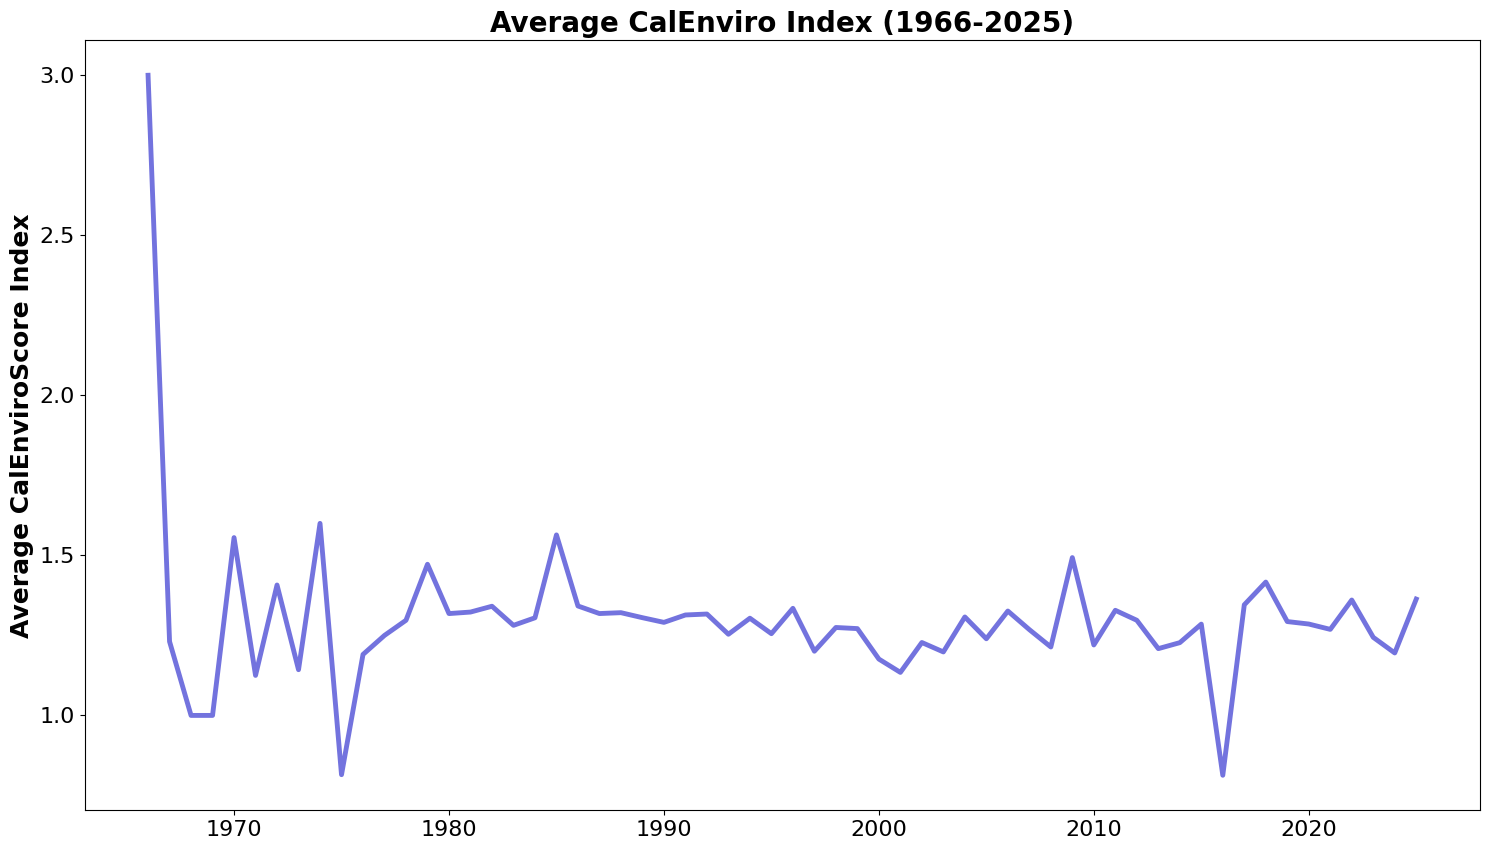

In [90]:
fig, ax = plt.subplots(figsize=(18, 10))

ax.plot(line_df.index, line_df['Scores_Code'], color='#7373DE', label='Average CalEnviroScore',linewidth=3.5)

ax.set_ylabel('Average CalEnviroScore Index', fontsize=18, weight= 'bold')
ax.set_xlabel('')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Average CalEnviro Index (1966-2025)', fontsize=20, weight= 'bold')
plt.savefig('average calenviro index .png')

In [91]:
site_per_year=year_df.groupby('year').agg({'MILITARY_DOD_SITE':'count'})
site_per_year.sort_values(ascending=0,inplace=True, by='MILITARY_DOD_SITE')
site_per_year

,MILITARY_DOD_SITE
year,
1990,4675
1989,4510
1988,3919
1987,3918
1991,3585
1992,3018
1998,3003
1986,2916
1985,2885


In [92]:
bar_start= list(range(1966,2026,5))
bar_start

[1966, 1971, 1976, 1981, 1986, 1991, 1996, 2001, 2006, 2011, 2016, 2021]

In [93]:
bar_mid= [b+2 for b in bar_start]
bar_mid

[1968, 1973, 1978, 1983, 1988, 1993, 1998, 2003, 2008, 2013, 2018, 2023]

In [94]:
bar_end= [b+4 for b in bar_start]
bar_end

[1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]

In [95]:
def bar(year):
    if year in range(1966,1971):
        return 1968
    elif year in range(1971,1976):
        return 1973
    elif year in range(1976,1981):
        return 1978
    elif year in range(1981,1986):
        return 1983
    elif year in range(1986,1991):
        return 1988
    elif year in range(1991,1996):
        return 1993
    elif year in range(1996,2001):
        return 1998
    elif year in range(2001,2006):
        return 2003
    elif year in range(2006,2011):
        return 2008
    elif year in range(2011,2016):
        return 2013
    elif year in range(2016,2021):
        return 2018
    elif year in range(2021,2026):
        return 2023

In [96]:
year_df['bar']=year_df['year'].apply(bar)

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_17380\1931578787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['bar']=year_df['year'].apply(bar)


In [97]:
year_df.head()

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,LONGITUDE,COORDINATE_SOURCE,CASE_TYPE,STATUS,STATUS_DATE,CLAIM_NO,CLAIM_STATUS,LEAD_AGENCY,CASEWORKER,LOCAL_AGENCY,...,HOW_DISCOVERED,HOW_DISCOVERED_DESCRIPTION,DISCHARGE_SOURCE,DISCHARGE_CAUSE,STOP_METHOD,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION,year,Status_Category,Scores_Category,Scores_Code,bar
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,-121.215291,Manual Entry on Screens,Military Cleanup Site,Open - Long Term Management,2022-04-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),KLS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3),2009,Open,Medium,2,2008
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,-122.709840,NaN,Cleanup Program Site,Open - Remediation,2023-02-28,NaN,NaN,NORTH COAST RWQCB (REGION 1),MWS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1),2019,Open,Low,1,2018
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,-120.673299,NaN,* NPDES,Active,2024-09-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),SC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3),2014,Open,Low,1,2013
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,-120.477262,Google Map Move,LUST Cleanup Site,Open - Site Assessment,2006-02-28,"19107, 21237, B0340, E0084","Ineligible, Active, Ineligible, Ineligible",CENTRAL VALLEY RWQCB (REGION 5S),BDS,MERCED COUNTY,...,Site Assessment/Site Investigation,NaN,Other,Unknown,Remove Contents,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F),2006,Open,Unrecorded,0,2008
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,-121.987424,NaN,Cleanup Program Site,Open - Site Assessment,2014-12-08,NaN,NaN,SANTA CLARA COUNTY LOP,HH,SANTA CLARA COUNTY LOP,...,Site Assessment/Site Investigation,NaN,NaN,Unknown,NaN,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2),2014,Open,Low,1,2013


In [98]:
stacked_df=pd.DataFrame(year_df.groupby(['bar','Status_Category']).size())
stacked_df

0
bar  Status_Category       
1968 Closed              25
     Open                10
     Others               1
1973 Closed             127
     Open                35
     Others               5
1978 Closed             130
     Open                71
     Others               5
1983 Closed            3394
     Open               355
     Others              19
1988 Closed           18506
     Open              1411
     Others              21
1993 Closed           13289
     Open               851
     Others              25
1998 Closed           10731
     Open              1005
     Others              32
2003 Closed            5662
     Open               919
     Others              21
2008 Closed            2895
     Open               866
     Others              20
2013 Closed            2042
     Open              1667
     Others              14
2018 Closed            2070
     Open              2050
     Others             230
2023 Closed            1343
     Open              1011
     Others             343

In [99]:
year_df.dtypes

GLOBAL_ID                                    object
BUSINESS_NAME                                object
STREET_NUMBER                                object
STREET_NAME                                  object
CITY                                         object
STATE                                        object
ZIP                                          object
COUNTY                                       object
EPA_REGION                                    int64
LATITUDE                                    float64
LONGITUDE                                   float64
COORDINATE_SOURCE                            object
CASE_TYPE                                    object
STATUS                                       object
STATUS_DATE                                  object
CLAIM_NO                                     object
CLAIM_STATUS                                 object
LEAD_AGENCY                                  object
CASEWORKER                                   object
LOCAL_AGENCY

In [100]:
stacked_df_reverse = stacked_df.pivot_table(index='bar', columns='Status_Category', values=0, aggfunc='sum')

In [101]:
stacked_df_reverse

Status_Category,Closed,Open,Others
bar,,,
1968,25,10,1
1973,127,35,5
1978,130,71,5
1983,3394,355,19
1988,18506,1411,21
1993,13289,851,25
1998,10731,1005,32
2003,5662,919,21
2008,2895,866,20


In [102]:
stacked_df_reverse=stacked_df_reverse[['Closed','Others','Open']]

In [103]:
stacked_cmap= ['#DE7C73', '#F2E463','#87E681']

NameError: name 'intervalslist' is not defined

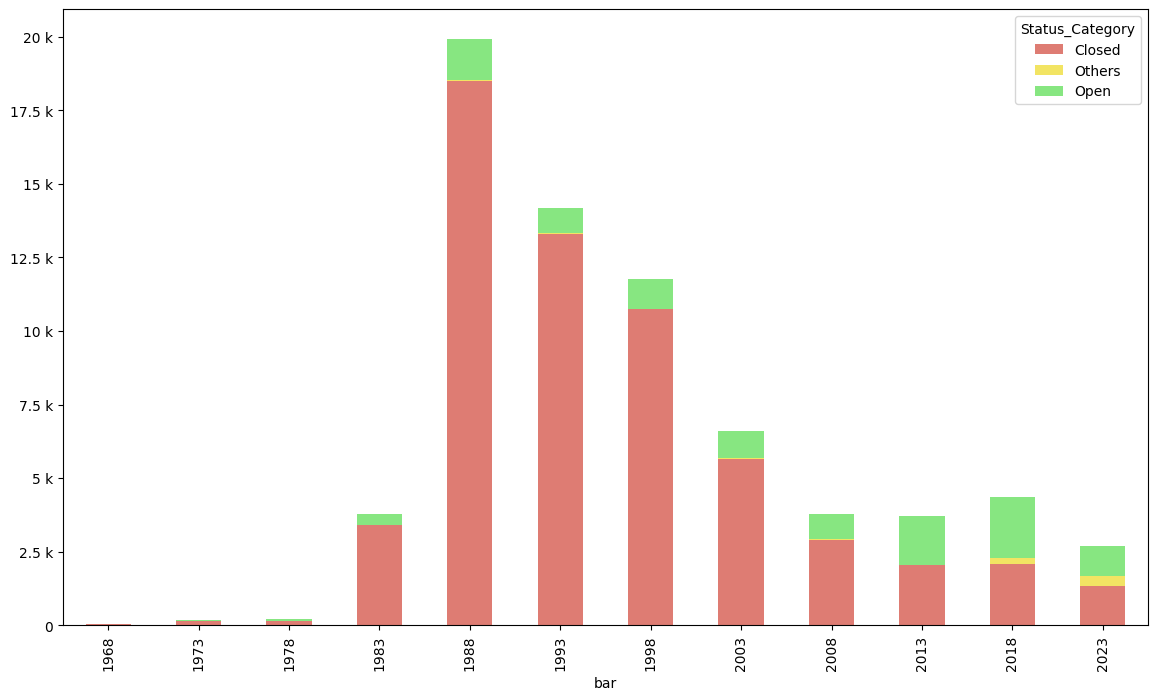

In [104]:
from matplotlib.ticker import EngFormatter
fig, ax = plt.subplots(figsize=(14, 8))
stacked_df_reverse.plot(kind='bar', stacked=True, color=stacked_cmap, ax=ax)
plt.gca().yaxis.set_major_formatter(EngFormatter())
ax.set_xticklabels(intervalslist)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylabel('Number of Sites', fontsize=14, fontweight='bold')
ax.set_xlabel('')
ax.legend(
    loc='upper right',
    title='Status Category',
    fontsize = 'large',
    title_fontsize=14)
plt.title('Ground Water Sites Status (1966-2025)', weight ='bold', fontsize=18)
plt.savefig('site status.png',bbox_inches='tight')

In [105]:
sitescount= stacked_df_reverse.sum(axis=1)

In [106]:
sitescount

bar
1968       36
1973      167
1978      206
1983     3768
1988    19938
1993    14165
1998    11768
2003     6602
2008     3781
2013     3723
2018     4350
2023     2697
dtype: int64

In [107]:
bar_avg_df=year_df.groupby('bar').agg({'Scores_Code':'mean'})
bar_avg_df

,Scores_Code
bar,
1968,1.472222
1973,1.065868
1978,1.320388
1983,1.503715
1988,1.312870
1993,1.291423
1998,1.256883
2003,1.212360
2008,1.317641


In [108]:
stacked_cmap_light=['#FFD6C9','#FFF8B8','#CAF2C2']

NameError: name 'intervalslist' is not defined

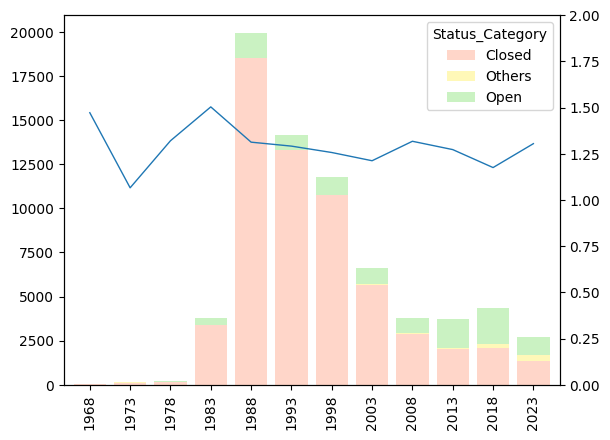

In [109]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
stacked_df_reverse.plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    color=stacked_cmap_light,
    width=0.8)
pos= range(len(bar_avg_df.index))
ax2.plot(
    pos,
    bar_avg_df['Scores_Code'],
    label='Average CalEnviro Index',
    linewidth=1,)

ax2.set_ylim(0, 2)    
ax1.set_xlabel('')
ax1.set_xticklabels(intervalslist, rotation=45, fontsize=8)
ax1.set_ylabel('Number of Sites')
ax2.set_ylabel('Average CalEnviro Index')
bars,label1= ax1.get_legend_handles_labels()
line, label2 = ax2.get_legend_handles_labels()

ax1.legend(
    bars+line,
    label1+label2,
    loc='upper right',
    title='Status Category',
    fontsize = 'small' )
ax1.set_title('Number of Sites Status & Average CalEnviro Index (1965-2025)', fontsize=10)
plt.savefig('Number_of_sites_combo_ACI.png')  

In [110]:
new=zip(bar_start,bar_end)
list(new)

[(1966, 1970),
 (1971, 1975),
 (1976, 1980),
 (1981, 1985),
 (1986, 1990),
 (1991, 1995),
 (1996, 2000),
 (2001, 2005),
 (2006, 2010),
 (2011, 2015),
 (2016, 2020),
 (2021, 2025)]

In [111]:
intervalslist=['1966-1970','1971-1975','1976-1980','1981-1985','1986-1990','1991-1995','1996-2000','2001-2005','2006-2010','2011-2015','2016-2020','2021-2025']

In [112]:
geotracker.POTENTIAL_CONTAMINANTS_OF_CONCERN.unique()

array(['Other Solvent or Non-Petroleum Hydrocarbon, Other Metal, Methane',
       'Asphalt, Diesel, Heating Oil / Fuel Oil, Kerosene, Waste Oil / Motor / Hydraulic / Lubricating',
       nan, ..., 'Tetrachloroethylene (PCE), Diesel, Kerosene',
       'Dichloroethane (DCA), Dichloroethene (DCE), Other Chlorinated Hydrocarbons, Tetrachloroethylene (PCE), Benzene, Diesel, Ethylbenzene, Gasoline, MTBE / TBA / Other Fuel Oxygenates, Naphthalene, Polynuclear aromatic hydrocarbons (PAHs), Toluene, Xylene',
       'Aviation, Diesel, Gasoline, Heating Oil / Fuel Oil, Kerosene'],
      shape=(4150,), dtype=object)

In [113]:
#potential contaninats tring to solve issue 
geotracker.POTENTIAL_CONTAMINANTS_OF_CONCERN=geotracker.POTENTIAL_CONTAMINANTS_OF_CONCERN.fillna('No record')

In [114]:
def cont_list(string):
    cleanstr=''
    newstr=''
    cont_list=[]
    for s in string:
        if s =='/':
            s = ','
        else:
            s
        newstr+=s
    cleanstr+=newstr
    cont_list=newstr.split(',')
    for c in cont_list:
        c.strip()
    return cont_list

In [115]:
cont_list('h/h ')

['h', 'h ']

In [116]:
geotracker['cont_list']=geotracker.POTENTIAL_CONTAMINANTS_OF_CONCERN.apply(cont_list)
geotracker

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,LONGITUDE,COORDINATE_SOURCE,CASE_TYPE,STATUS,STATUS_DATE,CLAIM_NO,CLAIM_STATUS,LEAD_AGENCY,CASEWORKER,LOCAL_AGENCY,...,SITE_HISTORY,BEGIN_DATE,LEAK_REPORTED_DATE,HOW_DISCOVERED,HOW_DISCOVERED_DESCRIPTION,DISCHARGE_SOURCE,DISCHARGE_CAUSE,STOP_METHOD,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION,year,cont_list
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,-121.215291,Manual Entry on Screens,Military Cleanup Site,Open - Long Term Management,2022-04-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),KLS,NaN,...,"This landfill is closed, and no longer receive...",2009-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3),2009.0,"[Other Solvent or Non-Petroleum Hydrocarbon, ..."
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,-122.709840,NaN,Cleanup Program Site,Open - Remediation,2023-02-28,NaN,NaN,NORTH COAST RWQCB (REGION 1),MWS,NaN,...,Please see the associated Geotracker for all i...,2019-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1),2019.0,"[Asphalt, Diesel, Heating Oil , Fuel Oil, ..."
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,-120.673299,NaN,* NPDES,Active,2024-09-01,NaN,NaN,CENTRAL COAST RWQCB (REGION 3),SC,NaN,...,NaN,2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3),2014.0,[No record]
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,-120.477262,Google Map Move,LUST Cleanup Site,Open - Site Assessment,2006-02-28,"19107, 21237, B0340, E0084","Ineligible, Active, Ineligible, Ineligible",CENTRAL VALLEY RWQCB (REGION 5S),BDS,MERCED COUNTY,...,In February of 2006 site assessment activities...,2006-02-28,2006-02-28T00:00:00Z,Site Assessment/Site Investigation,NaN,Other,Unknown,Remove Contents,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F),2006.0,"[Gasoline, Heating Oil , Fuel Oil]"
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,-121.987424,NaN,Cleanup Program Site,Open - Site Assessment,2014-12-08,NaN,NaN,SANTA CLARA COUNTY LOP,HH,SANTA CLARA COUNTY LOP,...,pestcides in shallow soil soil vapor sampling...,2014-11-03,2014-11-03T00:00:00Z,Site Assessment/Site Investigation,NaN,NaN,Unknown,NaN,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2),2014.0,"[Trichloroethylene (TCE), DDD , DDE , DDT]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75058,SLT5S0753116,CHEVRON PIPELINE CO - FORMER STANDARD OIL PIPE...,NaN,HIGHWAY 33,Patterson,CA,NaN,Stanislaus,9,37.472398,-121.130123,NaN,Cleanup Program Site,Open - Inactive,1998-03-28,NaN,NaN,CENTRAL VALLEY RWQCB (REGION 5S),ZZZ,NaN,...,NaN,1998-03-27,1965-01-02T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta-Mendota Canal - Patterson (541.10),San Joaquin Valley - Delta-Mendota (5-022.07),Disadvantaged Community,81-85%,60-65%,No,NaN,CENTRAL VALLEY RWQCB (REGION 5S),1998.0,[No record]
75059,DOD100037100,Camp Pendleton Marine Corps Base (MCB) - OU 3 ...,NaN,Box 5

In [117]:
geotracker[['cont_list']]

,cont_list
0,"[Other Solvent or Non-Petroleum Hydrocarbon, ..."
1,"[Asphalt, Diesel, Heating Oil , Fuel Oil, ..."
2,[No record]
3,"[Gasoline, Heating Oil , Fuel Oil]"
4,"[Trichloroethylene (TCE), DDD , DDE , DDT]"
...,...
75058,[No record]
75059,[No record]
75060,[No record]
75061,"[Diesel, Heating Oil , Fuel Oil]"


In [118]:
contaminant_counts = {}
for i in geotracker['cont_list']:
    for j in i:
        contaminant = j.strip()
        if contaminant:
            if contaminant in contaminant_counts:
                contaminant_counts[contaminant] += 1
            else:
                contaminant_counts[contaminant] = 1

In [119]:
def contaminant_count(row):
    counts = []
    for i in row:
        contaminant = i.strip()
        counts.append(contaminant_counts.get(contaminant, 0))
    return counts
geotracker['contaminant_counts'] = geotracker['cont_list'].apply(contaminant_count)

In [120]:
geotracker_cont=geotracker[['cont_list','contaminant_counts']]

In [121]:
geotracker_cont=geotracker_cont[geotracker_cont['cont_list'] != 'No record']

In [122]:
geotracker_cont= geotracker_cont.explode(['cont_list', 'contaminant_counts'])

In [123]:
geotracker_cont=geotracker_cont.drop_duplicates(subset=['cont_list','contaminant_counts'])

In [124]:
geotracker_cont

,cont_list,contaminant_counts
0,Other Solvent or Non-Petroleum Hydrocarbon,1892
0,Other Metal,794
0,Methane,64
1,Asphalt,44
1,Diesel,12513
...,...,...
68585,* * DIISOPROPYL ETHER,1
68585,* * ETHANOL,1
68585,* * ETHYL-TERT-BUTYL ETHER,1
68585,* * TERBUTHYLAZINE,1


In [125]:
geotracker_cont=geotracker_cont.drop_duplicates()

In [126]:
geotracker_cont.drop_duplicates()

,cont_list,contaminant_counts
0,Other Solvent or Non-Petroleum Hydrocarbon,1892
0,Other Metal,794
0,Methane,64
1,Asphalt,44
1,Diesel,12513
...,...,...
68585,* * DIISOPROPYL ETHER,1
68585,* * ETHANOL,1
68585,* * ETHYL-TERT-BUTYL ETHER,1
68585,* * TERBUTHYLAZINE,1


In [127]:
geotracker_cont.sort_values(by='contaminant_counts', ascending=0)

,cont_list,contaminant_counts
3,Gasoline,30821
8,Gasoline,30821
2,No record,18999
1,Diesel,12513
32,Diesel,12513
...,...,...
42080,* * DDD,1
42080,* * DDE,1
42080,* * DIBROMOCHLOROMETHANE (THM),1
42080,* * DICAMBA,1


In [128]:
geotracker_cont.drop_duplicates()

,cont_list,contaminant_counts
0,Other Solvent or Non-Petroleum Hydrocarbon,1892
0,Other Metal,794
0,Methane,64
1,Asphalt,44
1,Diesel,12513
...,...,...
68585,* * DIISOPROPYL ETHER,1
68585,* * ETHANOL,1
68585,* * ETHYL-TERT-BUTYL ETHER,1
68585,* * TERBUTHYLAZINE,1


In [129]:
geotracker_cont.sort_values(by='contaminant_counts', ascending=0)

,cont_list,contaminant_counts
3,Gasoline,30821
8,Gasoline,30821
2,No record,18999
1,Diesel,12513
32,Diesel,12513
...,...,...
42080,* * DDD,1
42080,* * DDE,1
42080,* * DIBROMOCHLOROMETHANE (THM),1
42080,* * DICAMBA,1


In [130]:
geotracker_cont['clean_cont']= 

SyntaxError: invalid syntax (487738549.py, line 1)

In [131]:
def clean(val):
    val= val.strip()
    return val

In [132]:
geotracker_cont['clean_cont']=geotracker_cont['cont_list'].apply(clean)

In [133]:
geotracker_cont

,cont_list,contaminant_counts,clean_cont
0,Other Solvent or Non-Petroleum Hydrocarbon,1892,Other Solvent or Non-Petroleum Hydrocarbon
0,Other Metal,794,Other Metal
0,Methane,64,Methane
1,Asphalt,44,Asphalt
1,Diesel,12513,Diesel
...,...,...,...
68585,* * DIISOPROPYL ETHER,1,* * DIISOPROPYL ETHER
68585,* * ETHANOL,1,* * ETHANOL
68585,* * ETHYL-TERT-BUTYL ETHER,1,* * ETHYL-TERT-BUTYL ETHER
68585,* * TERBUTHYLAZINE,1,* * TERBUTHYLAZINE


In [134]:
geotracker_cont.sort_values(by='contaminant_counts', ascending=0)

,cont_list,contaminant_counts,clean_cont
3,Gasoline,30821,Gasoline
8,Gasoline,30821,Gasoline
2,No record,18999,No record
1,Diesel,12513,Diesel
32,Diesel,12513,Diesel
...,...,...,...
42080,* * DDD,1,* * DDD
42080,* * DDE,1,* * DDE
42080,* * DIBROMOCHLOROMETHANE (THM),1,* * DIBROMOCHLOROMETHANE (THM)
42080,* * DICAMBA,1,* * DICAMBA


In [135]:
geotracker_cont.drop_duplicates()

,cont_list,contaminant_counts,clean_cont
0,Other Solvent or Non-Petroleum Hydrocarbon,1892,Other Solvent or Non-Petroleum Hydrocarbon
0,Other Metal,794,Other Metal
0,Methane,64,Methane
1,Asphalt,44,Asphalt
1,Diesel,12513,Diesel
...,...,...,...
68585,* * DIISOPROPYL ETHER,1,* * DIISOPROPYL ETHER
68585,* * ETHANOL,1,* * ETHANOL
68585,* * ETHYL-TERT-BUTYL ETHER,1,* * ETHYL-TERT-BUTYL ETHER
68585,* * TERBUTHYLAZINE,1,* * TERBUTHYLAZINE


In [136]:
geotracker_cont.sort_values(by='contaminant_counts', ascending=0)

,cont_list,contaminant_counts,clean_cont
3,Gasoline,30821,Gasoline
8,Gasoline,30821,Gasoline
2,No record,18999,No record
1,Diesel,12513,Diesel
32,Diesel,12513,Diesel
...,...,...,...
42080,* * DDD,1,* * DDD
42080,* * DDE,1,* * DDE
42080,* * DIBROMOCHLOROMETHANE (THM),1,* * DIBROMOCHLOROMETHANE (THM)
42080,* * DICAMBA,1,* * DICAMBA


In [137]:
geotracker_cont.drop('cont_list',axis=1, inplace=True)
geotracker_cont

,contaminant_counts,clean_cont
0,1892,Other Solvent or Non-Petroleum Hydrocarbon
0,794,Other Metal
0,64,Methane
1,44,Asphalt
1,12513,Diesel
...,...,...
68585,1,* * DIISOPROPYL ETHER
68585,1,* * ETHANOL
68585,1,* * ETHYL-TERT-BUTYL ETHER
68585,1,* * TERBUTHYLAZINE


In [138]:
geotracker_cont=geotracker_cont.drop_duplicates()

In [139]:
geotracker_cont.sort_values(by='contaminant_counts', ascending=0)

,contaminant_counts,clean_cont
3,30821,Gasoline
2,18999,No record
1,12513,Diesel
1,5442,Waste Oil
1,5442,Motor
...,...,...
35617,1,4
35617,1,5-T
38147,1,* NITRATE
42080,1,4-DB


In [140]:
geotracker_cont=geotracker_cont[geotracker_cont['clean_cont']!='No record']

In [141]:
geocontvis=geotracker_cont.sort_values(by='contaminant_counts', ascending=0).head(10)
geocontvis
geocontvis.to_csv('geocount.csv')

In [142]:
geocontvis=geocontvis.set_index('clean_cont')

<Axes: xlabel='clean_cont'>

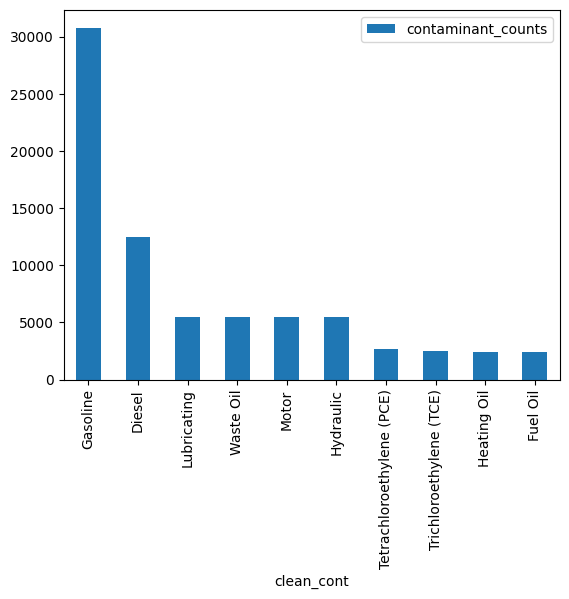

In [143]:
geocontvis.plot(kind='bar')

In [157]:
list_cont=['Gasoline','Diesel','Lubricating','Waste Oil','Motor','Hydraulic','PCE','TCE','Heating Oil','Feul Oil']

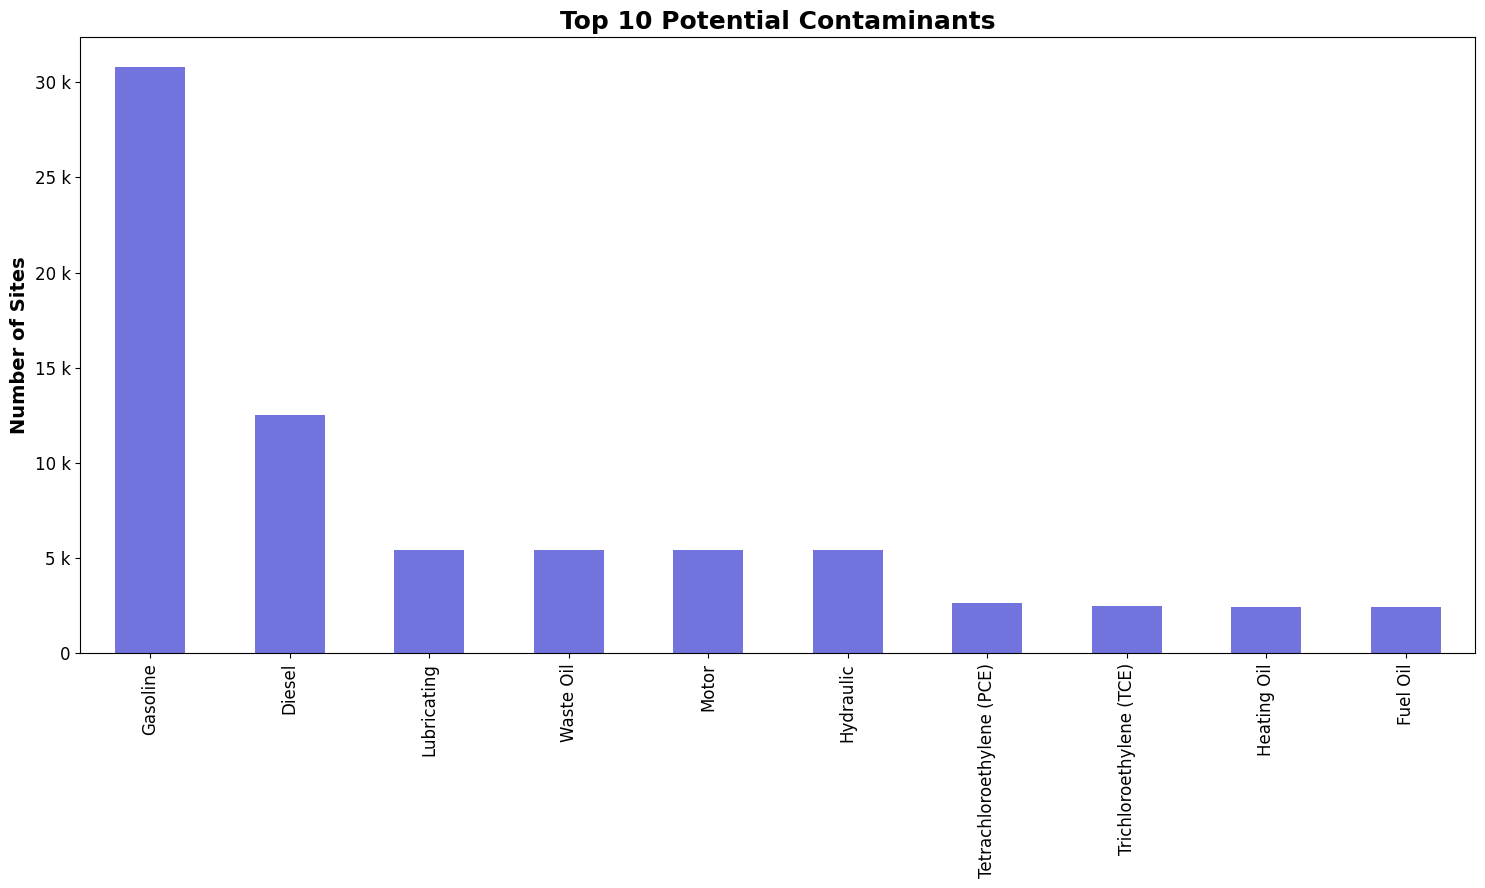

In [172]:
from matplotlib.ticker import EngFormatter
fig, ax = plt.subplots(figsize=(18, 8))
geocontvis.plot(kind='bar', ax=ax, legend=0,color='#7373DE')
plt.gca().yaxis.set_major_formatter(EngFormatter())
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_ylabel('Number of Sites', fontsize=14, fontweight='bold')
ax.set_xlabel('')
plt.title('Top 10 Potential Contaminants', weight ='bold', fontsize=18)
plt.savefig('Potential Contaminants.png',bbox_inches='tight')

AttributeError: 'DataFrame' object has no attribute 'clean_cont'

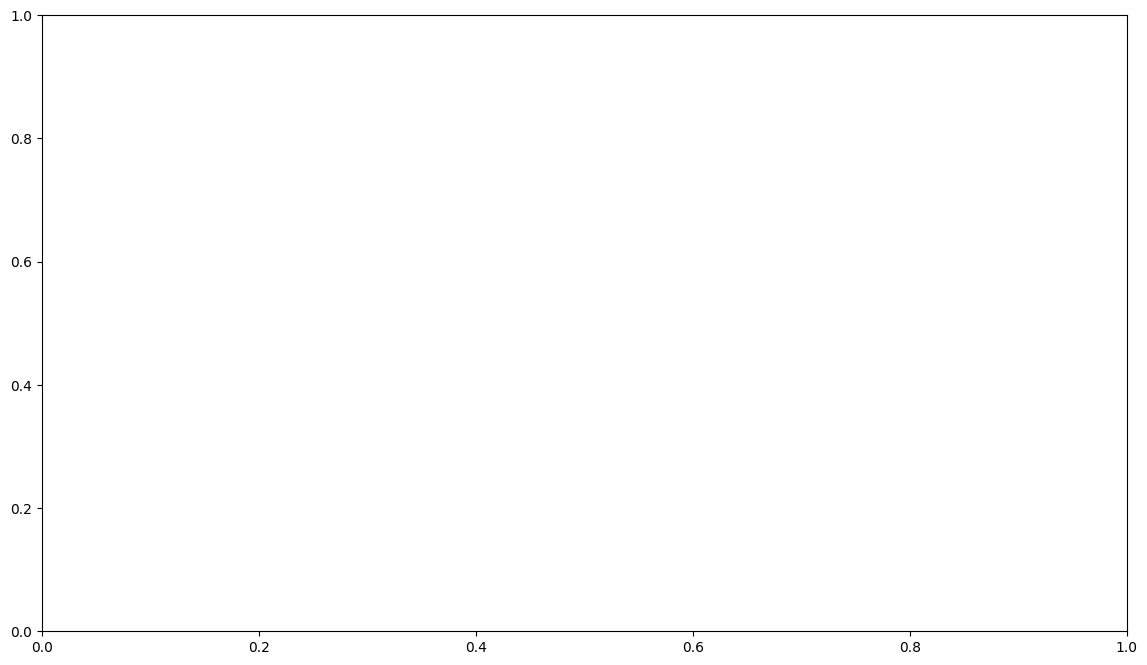

In [168]:
from matplotlib.ticker import EngFormatter
fig, ax = plt.subplots(figsize=(14, 8))
geocontvis.plot(geocontvis.contaminant_counts,geocontvis.clean_cont,kind='barh', ax=ax, legend=0,color='#7373DE')
plt.gca().yaxis.set_major_formatter(EngFormatter())
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_ylabel('Number of Sites', fontsize=14, fontweight='bold')
ax.set_xlabel('')
plt.title('Top 10 Potential Contaminants', weight ='bold', fontsize=18)
plt.savefig('site status.png',bbox_inches='tight')